# Weather Patterns - Assignment

The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Global Historical Climatology Network daily (GHCNd)](https://www.ncei.noaa.gov/products/land-based-station/global-historical-climatology-network-daily) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe - it's a wonderfully large dataset to play with! In particular, you will be asked to use data from the Ann Arbor Michigan location.

Each row in this datafile corresponds to a single observation from a weather station, and has the following variables:
* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write a python notebook which plots line graphs of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015. (Based on the graph, do you think extreme weather is getting more frequent in 2015?)
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

## Prepare Dataset

In [3]:
df = pd.read_csv('resource/weather-patterns.csv')
df.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [7]:
#parse Date from str to Date
df['Date'] = pd.to_datetime(df['Date'])

#transform tenths of degrees
df['Data_Value'] = df['Data_Value']/10

In [27]:
#Create Pivot Table grouping by date and get min and max temperature
df_minmax = df.pivot_table(
    values='Data_Value', 
    index='Date', 
    aggfunc=['min', 'max']
).droplevel(1, axis=1)

#removing index name
df_minmax.index.name = None

In [37]:
#removing 29th Feb
df_minmax = df_minmax.loc[~((df_minmax.index.day == 29) & (df_minmax.index.month == 2))]

In [82]:
#Separate periods and group by month-day (2005 - 2014)
df_until_2014 = df_minmax.loc[(df_minmax.index.year < 2015)]
df_until_2014 = df_until_2014.groupby(lambda x: pd.to_datetime('2015-'+str(x.month)+'-'+str(x.day)))

df_until_2014 = pd.merge(df_until_2014['max'].max(), df_until_2014['min'].min(), left_index=True, right_index=True)


#Separate periods (2015)
df_2015 = df_minmax.loc[(df_minmax.index.year >= 2015)]

## Plotting

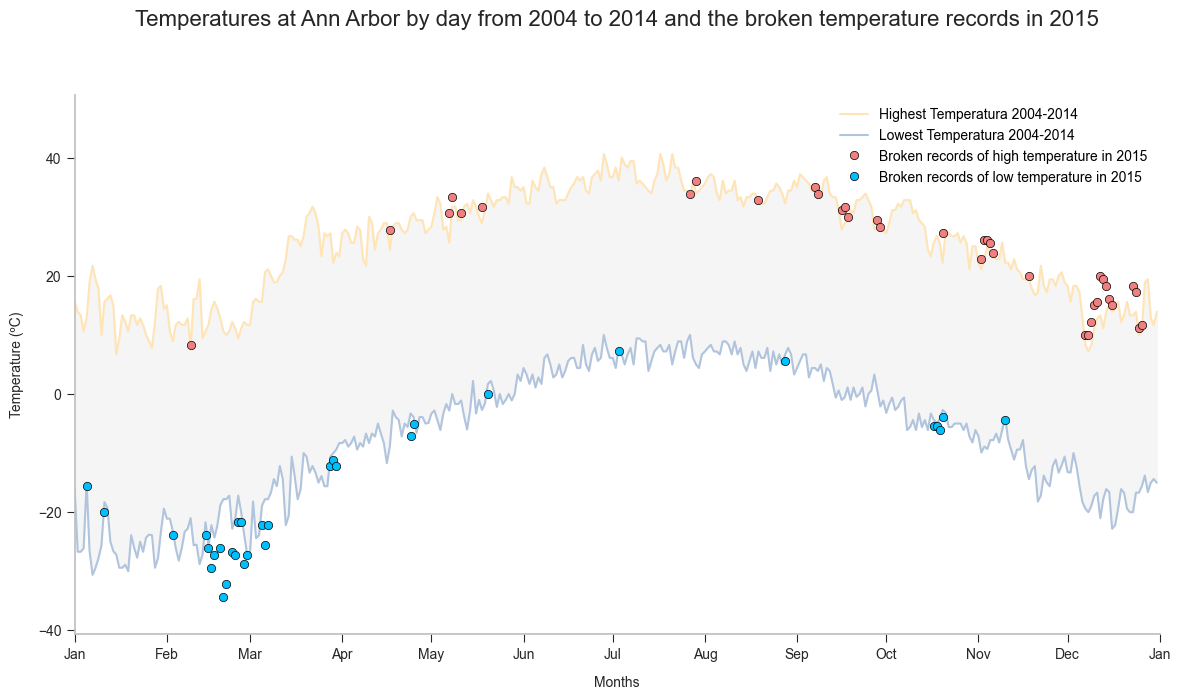

In [213]:
#Init Graphs
plt.figure(figsize = (14, 7))
plt.tight_layout()

########################################
##            Plots                   ##
########################################

#Plot max 2004 - 2014
plt.plot(
    df_until_2014['max'], 
    label = 'Highest Temperatura 2004-2014', 
    color=mcolors.CSS4_COLORS['moccasin']
)

#Plot min 2004 - 2014
plt.plot(
    df_until_2014['min'], 
    label = 'Lowest Temperatura 2004-2014', 
    color=mcolors.CSS4_COLORS['lightsteelblue']
)

#Fill between high and low
plt.fill_between(
    df_until_2014.index, 
    df_until_2014['max'], 
    df_until_2014['min'], 
    color= mcolors.CSS4_COLORS['whitesmoke']
)

#Plot
plt.plot(
    df_2015[df_2015['max'] > df_until_2014['max']]['max'], 
    markeredgewidth = 0.5, 
    markeredgecolor = mcolors.CSS4_COLORS['black'], 
    linestyle='', 
    marker='o', 
    label = 'Broken records of high temperature in 2015',
    color=mcolors.CSS4_COLORS['lightcoral']
)

plt.plot(
    df_2015[df_2015['min'] < df_until_2014['min']]['min'], 
    markeredgewidth = 0.5, 
    markeredgecolor = mcolors.CSS4_COLORS['black'], 
    linestyle='', 
    marker='o', 
    label = 'Broken records of low temperature in 2015',
    color=mcolors.CSS4_COLORS['deepskyblue']
)

########################################
##            Axis                    ##
########################################

#Hide Spines axis
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(mcolors.CSS4_COLORS['silver'])
ax.spines['left'].set_color(mcolors.CSS4_COLORS['silver'])

#Set Months Range
months_range = pd.date_range(start='1-01-2015', end='1-01-2016', freq='MS')
months_name = list(months_range.month_name().str.slice(stop = 3))

#Set Limists and ticklabels
ax.set_xlim(pd.to_datetime('2015-01-01'), pd.to_datetime('2015-01-10'))
ax.set_xticks(months_range, labels = months_name);
ax.set_ylim(df_until_2014['min'].min()-10, df_until_2014['max'].max()+10)


########################################
##            Text                    ##
########################################

#Title
plt.title('Temperatures at Ann Arbor by day from 2004 to 2014 and the broken temperature records in 2015', pad = 50, fontsize=16)

#labels 
ax.set_ylabel('Temperature (ºC)', labelpad = 10)
ax.set_xlabel('Months', labelpad = 10)

#Legend
plt.legend(
    frameon = False,
    labelcolor = 'black',
    fontsize = 10
);

plt.savefig('AnnArbor_temperatures.png')